<a href="https://colab.research.google.com/github/AbdallahAwdalla/ImageProcessing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter



## Apply five-scale wavelet transform using the test image “Vase.tif”. Apply the following wavelet types (different orders):



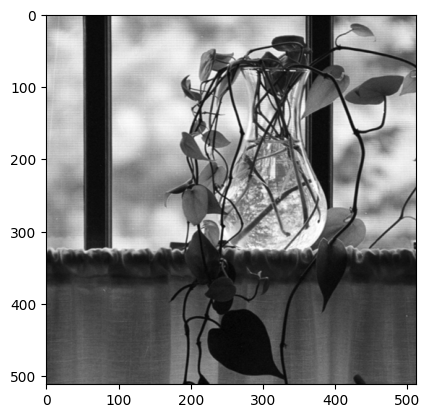

In [76]:

#load the Image to be proccessed
vase = Image.open('Vase.tif')
#showing the Image
plt.imshow(vase, cmap='gray')

# Generic Function for applying different transforms at different levels


In [77]:
def Apply_Trans( Trans, lev):

  coeffs2 = pywt.wavedec2(vase,Trans, level = lev)
  titles = ['Approximation', ' Horizontal detail',
            'Vertical detail', 'Diagonal detail']
  LL = coeffs2[0]
  LH = coeffs2[1][0]
  HL = coeffs2[1][1]
  HH = coeffs2[1][2]

  fig = plt.figure(figsize=(12, 3))
  for i, a in enumerate([LL, LH, HL, HH]):
      ax = fig.add_subplot(1, 4, i + 1)
      ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
      ax.set_title(titles[i], fontsize=10)
      ax.set_xticks([])
      ax.set_yticks([])

      # bx= fig.add_subplot(2, 8, i*2 +1)
      # bx.set_title('ZoomIn', fontsize=10)
      # im = (np.array(a, dtype=np.uint8))
      # bx.imshow(im,cmap='gray')

  fig.tight_layout()
  plt.show()


HAAR Transform

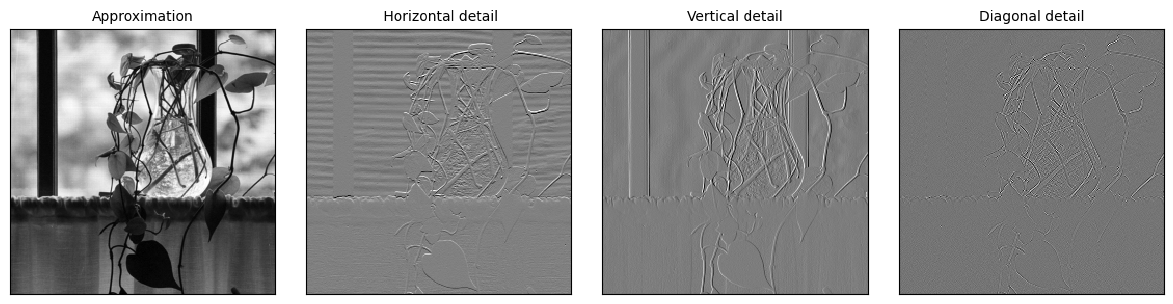

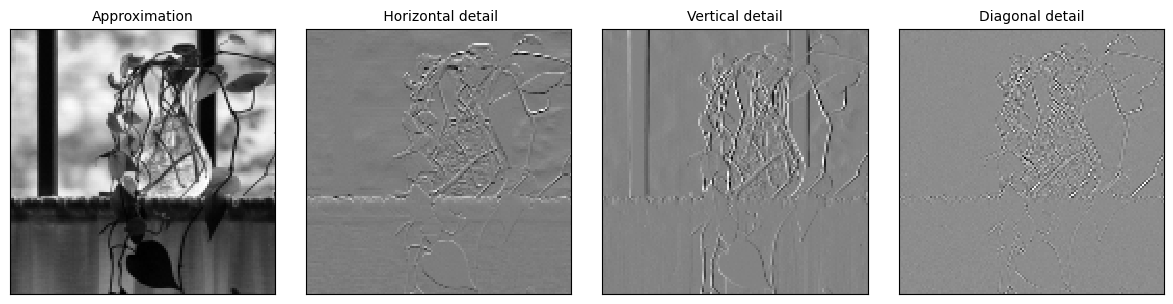

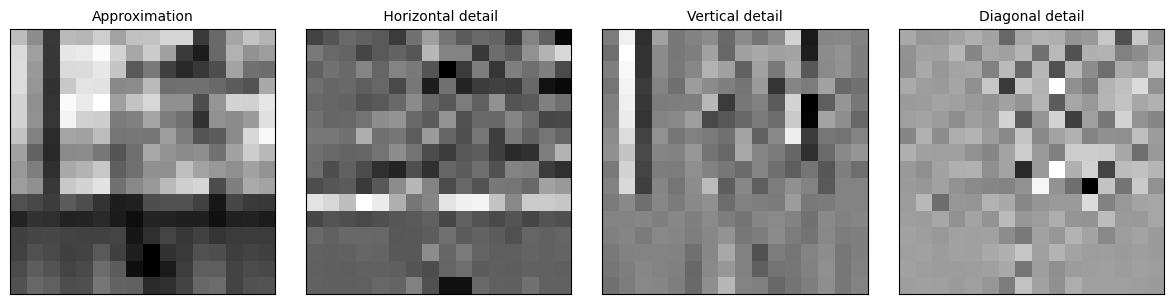

In [78]:
Apply_Trans( 'haar', 1)
Apply_Trans( 'haar', 2)
Apply_Trans( 'haar', 5)

# Daubechies


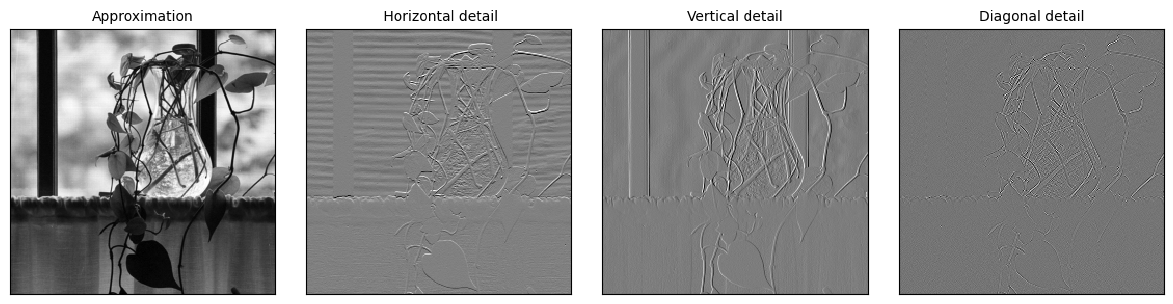

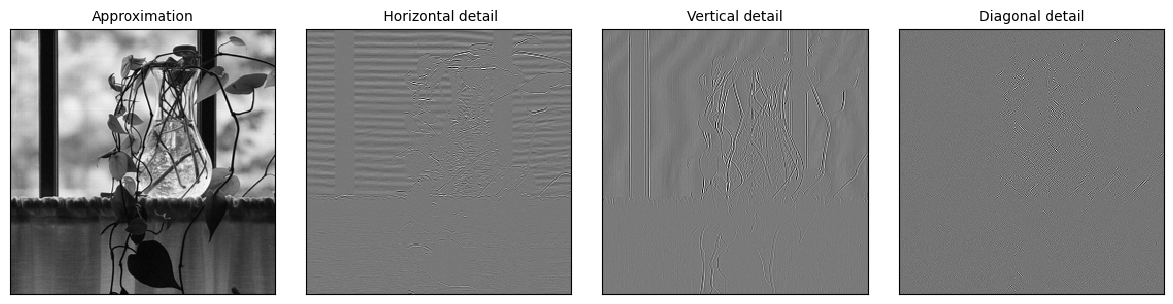

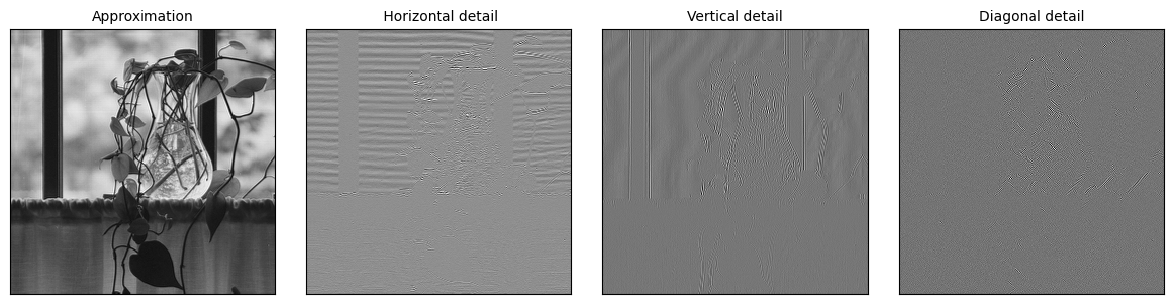

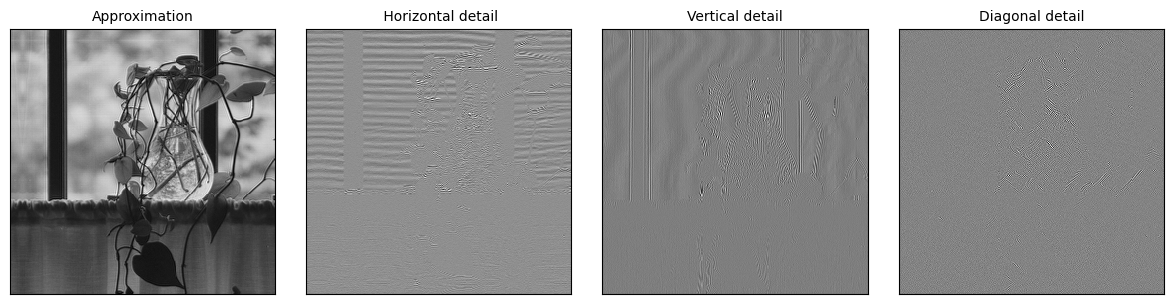

In [79]:
Apply_Trans( 'db1', 1)
Apply_Trans( 'db3', 1)
Apply_Trans( 'db8', 1)
Apply_Trans( 'db15', 1)

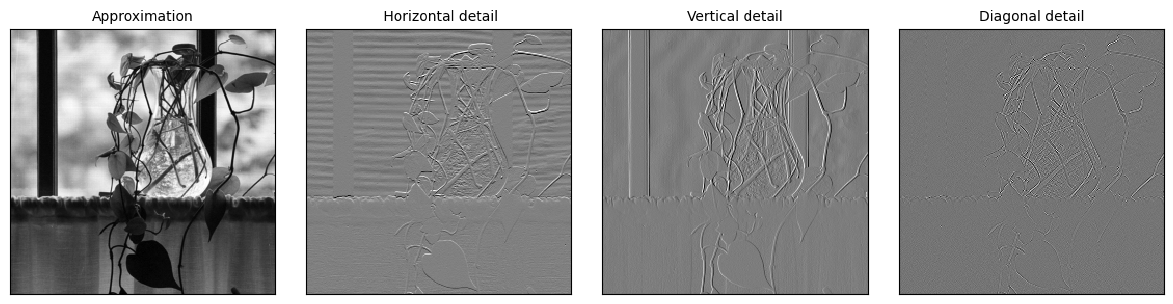

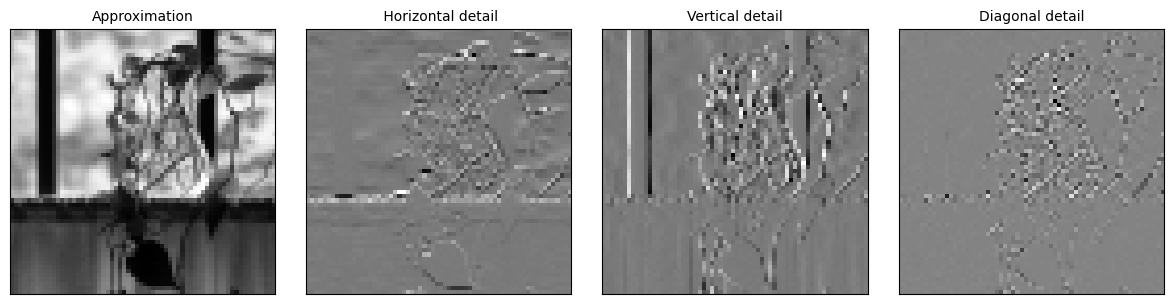

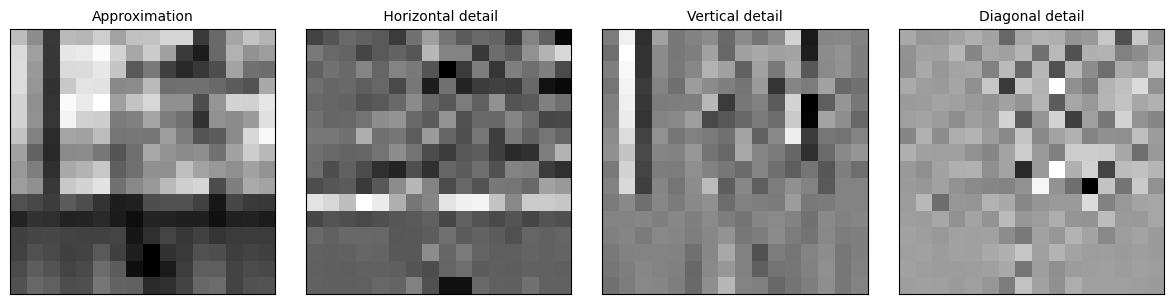

In [74]:
Apply_Trans( 'db1', 1)
Apply_Trans( 'db1', 3)
Apply_Trans( 'db1', 5)


# New Section

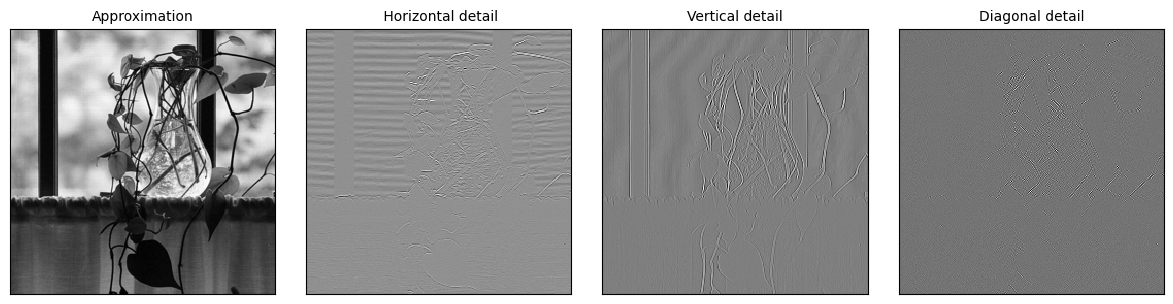

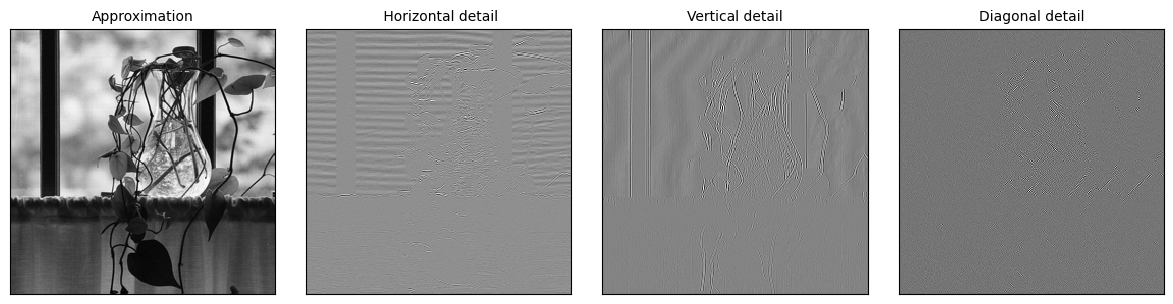

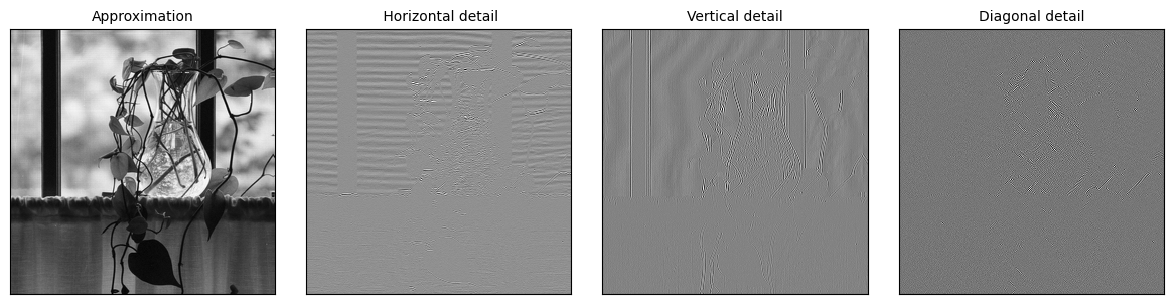

In [80]:
Apply_Trans( 'coif1', 1)
Apply_Trans( 'coif2', 1)
Apply_Trans( 'coif3', 1)

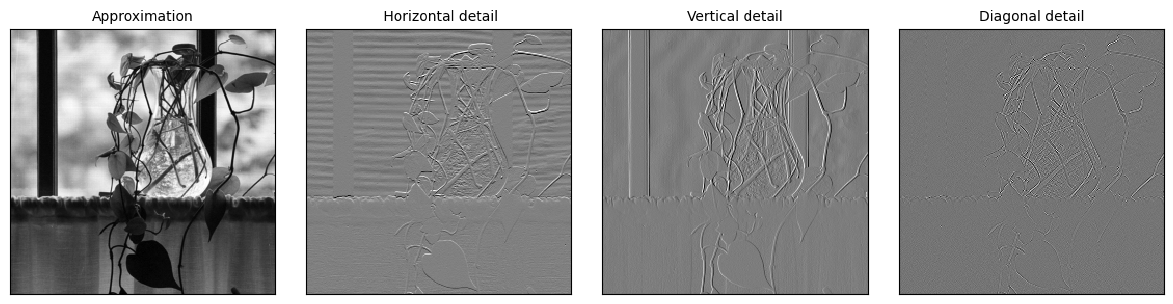

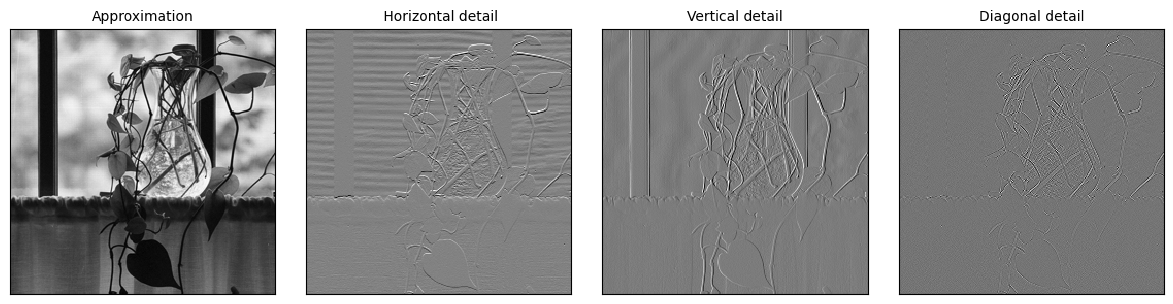

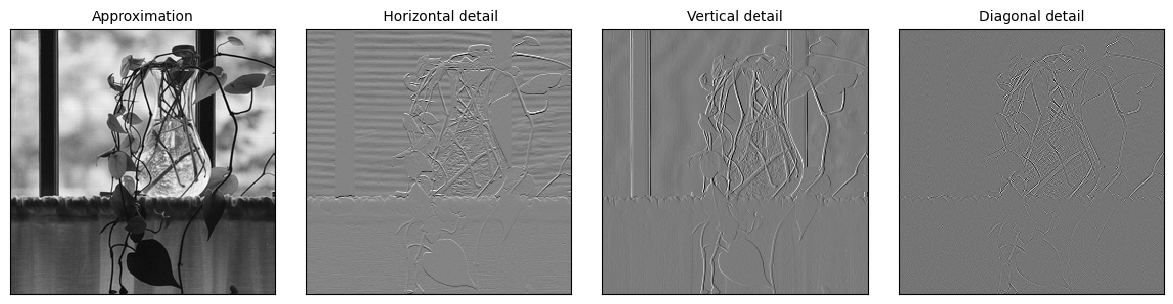

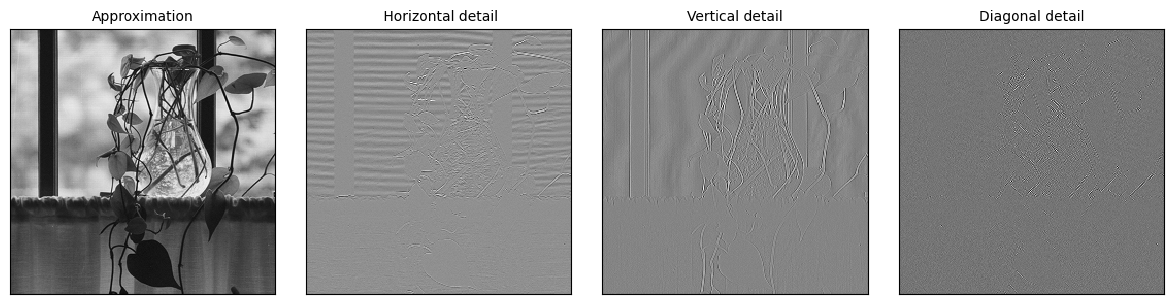

In [81]:
Apply_Trans( 'bior1.1', 1)
Apply_Trans( 'bior1.3', 1)
Apply_Trans( 'bior1.5', 1)
Apply_Trans( 'bior2.2', 1)

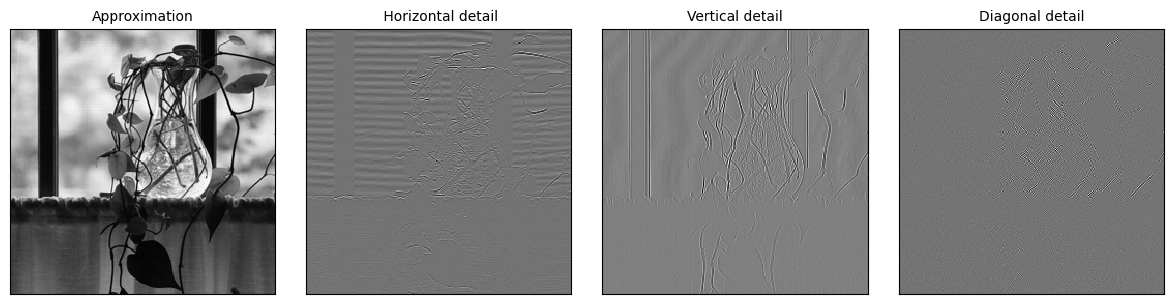

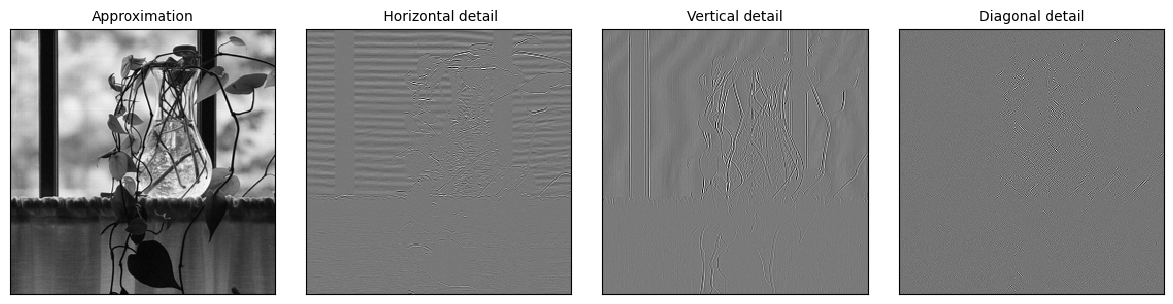

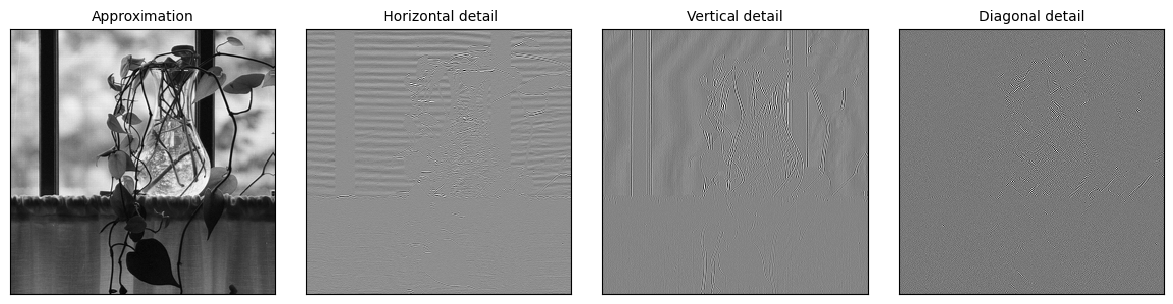

In [84]:
Apply_Trans( 'sym2', 1)
Apply_Trans( 'sym3', 1)
Apply_Trans( 'sym6', 1)


# Transform the test image “image1.tif”. Modify the wavelet coefficients by
# zeroing all approximation coefficients and different detailed coefficients.
# Reconstruct the image and comment on the results.

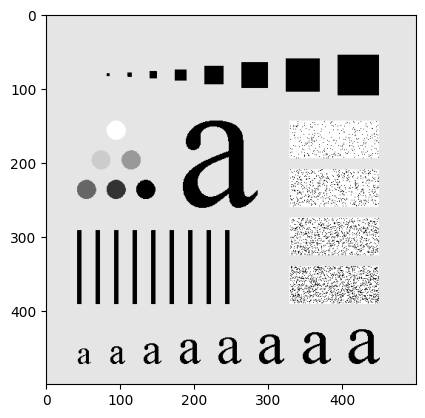

In [87]:
#load the Image to be proccessed
im1 = Image.open('image1.tif')
#showing the Image
plt.imshow(im1, cmap='gray')

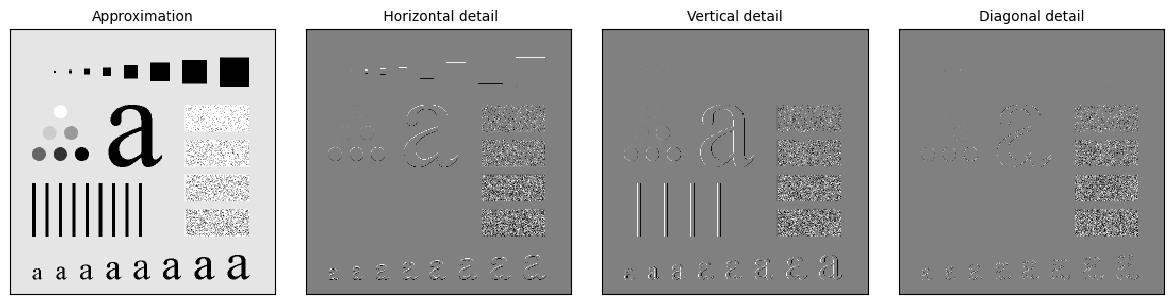

In [86]:
Apply_Trans( 'haar', 1)

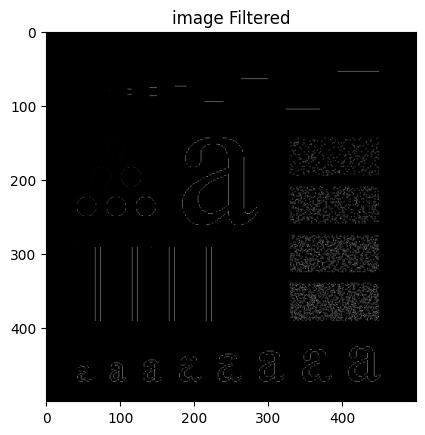

In [89]:

coeffs2 = pywt.wavedec2(im1,'haar', level = 1)
coeffs2[0] = np.zeros(coeffs2[0].size)
coeffs2[0] = coeffs2[0].reshape(250,250)
#reconstruct the image
RecoImage = pywt.waverec2(coeffs2, 'haar')
RecoImage = Image.fromarray(RecoImage)
#show the Image
plt.imshow(RecoImage, cmap='gray')
plt.title('image Filtered')
plt.show()

#  Apply Discrete Wavelet Transform on the noisy image “Noisy Image.tif”.compare the performance of DWT with the following denoising techniques:
- Adaptive median filter
- Notch Filter
- Wiener Filter
- Constrained Least Squares Filter

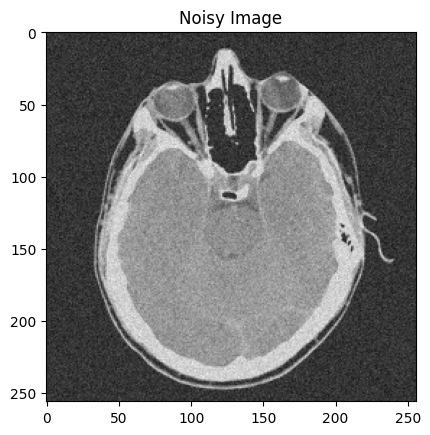

In [91]:
#load the Image to be proccessed
noisy = Image.open('Noisy Image.tif')
vase = Image.open('Noisy Image.tif')
#show the Image
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.show()

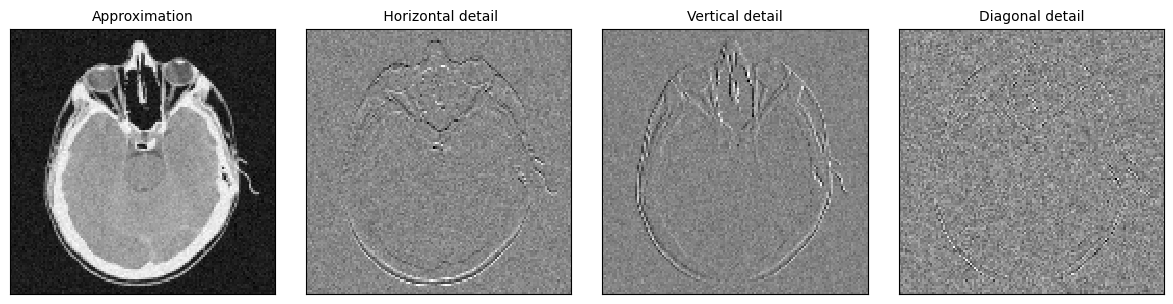

In [92]:
Apply_Trans( 'haar', 1)

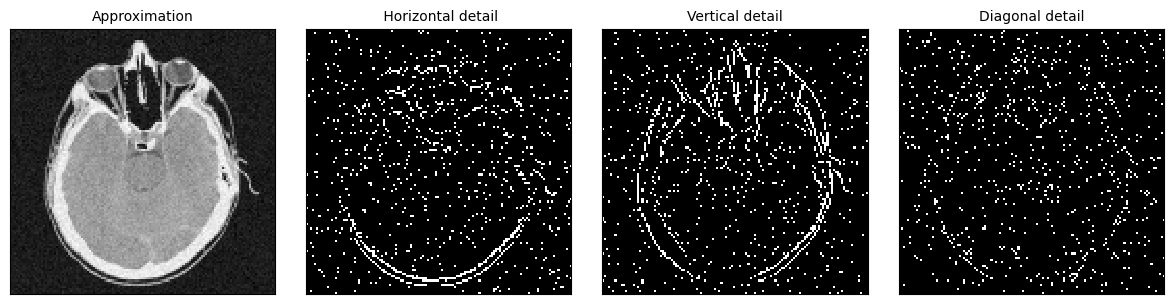

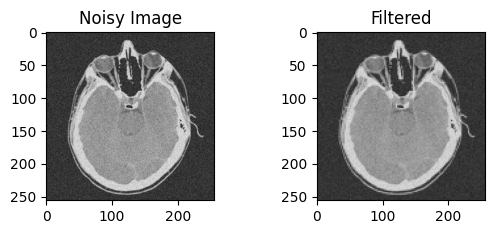

In [115]:
coeffs2 = pywt.wavedec2(noisy,'haar', level = 1)
# define threashold
threashold = 20


coeffs2[1] = (coeffs2[1][0] > threashold,
              coeffs2[1][1] > threashold,
              coeffs2[1][2] > threashold)

titles = ['Approximation', ' Horizontal detail',
            'Vertical detail', 'Diagonal detail']
LL = coeffs2[0]
LH = coeffs2[1][0]
HL = coeffs2[1][1]
HH = coeffs2[1][2]
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

RecoImage = pywt.waverec2(coeffs2, 'haar')
RecoImage = Image.fromarray(RecoImage)
#show the Images
#plot the Orignal Image

plt.subplot(222)
plt.imshow(RecoImage, cmap='gray')
plt.title('Filtered')

plt.subplot(221)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.show()


# Adaptive median filter

In [116]:

def calculate_median(array):
    """Return the median of 1-d array"""
    sorted_array = np.sort(array) #timsort (O(nlogn))
    median = sorted_array[len(array)//2]
    return median

def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2 #increase the size of S_xy to the next odd value.
        if(S_xy <= S_max): #repeat process
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

def amf(image, initial_window, max_window):
    """runs the Adaptive Median Filter proess on an image"""
    xlength, ylength = image.shape #get the shape of the image.

    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window #dynamically to grow

    output_image = image.copy()

    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] #filter window
            target = filter_window.reshape(-1) #make 1-dimensional
            z_min = np.min(target) #min of intensity values
            z_max = np.max(target) #max of intensity values
            z_med = calculate_median(target) #median of intensity values
            z_xy = image[row, col] #current intensity

            #Level A & B
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image


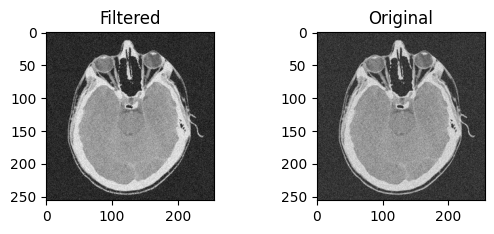

In [122]:
image = np.array(noisy)
output = amf(image, 3, 11)
output = Image.fromarray(output)

#plot the Orignal Image
plt.subplot(222)
plt.imshow(image, cmap='gray')
plt.title('Original')
#plot the Filtered Image
plt.subplot(221)
plt.imshow(output, cmap='gray')
plt.title('Filtered')

plt.show()